In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import Legendre
from abel import Transform

from vmitools import Hist2d, convert_df_xy2rth, finite_legendre_transform_in_theta, abel_inverse

%matplotlib inline

Modules 'dbpy', 'stpy' are not imported!


Generate demo data

In [2]:
x = np.linspace(-1, 1, 1000)
dist = Legendre([1, 0, -0.5, 0.5, 1])(x)

n = 1000000
r = np.random.normal(10, 0.5, size=n)
z = r * np.random.choice(x, size=n, p=dist/dist.sum())
th = 2*np.pi*np.random.rand(n)
x = (r**2 - z**2)**0.5 * np.cos(th)
y = (r**2 - z**2)**0.5 * np.sin(th)

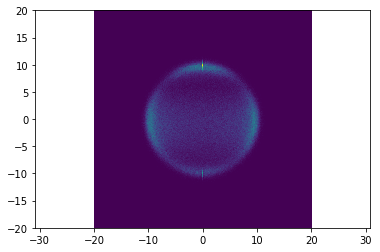

In [3]:
bins = np.linspace(-20, 20, 401)
img, *_ = np.histogram2d(x, z, bins=(bins, bins))

plt.figure()
plt.pcolormesh(bins, bins, img.T)
plt.axis('equal')
plt.show()

Abel-invert the image using PyAbel

Loading basis sets...           
Loading basis sets...           
Loading basis sets...           
Loading basis sets...           


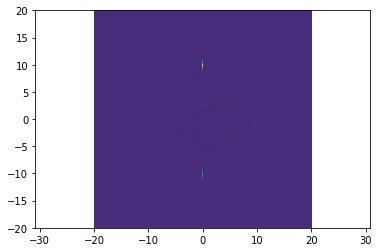

In [4]:
dz = bins[1:]-bins[:-1]
reconstructed_img = Transform(img.T, method='basex').transform.T / dz[None, :]
plt.pcolormesh(bins, bins, reconstructed_img.T)
plt.axis('equal')
plt.show()

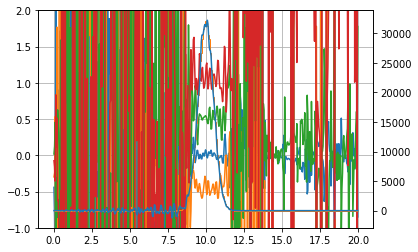

In [5]:
z_edges = bins
r_edges = np.linspace(0, 20, 501)
th_edges = np.linspace(-np.pi, np.pi, 721)
r_centers = (r_edges[:-1] + r_edges[1:]) / 2

reconstructed = Hist2d(reconstructed_img, z_edges, z_edges)
polarized = Hist2d(None, r_edges, th_edges)  # shape=(r,th)
polarized.intensity = convert_df_xy2rth(lambda z, r: reconstructed.intensity(r, z))

weighted = polarized.copy
weighted.intensity = lambda r, th: polarized.intensity(r, th)*abs(r*np.sin(th))*np.pi
_, coeff, _ = finite_legendre_transform_in_theta(polarized.hist.T,
                                                 polarized.y_edges,
                                                 4+1)  # shapes=(n,r)(n,th)

plt.figure()
for beta in coeff[1:]/coeff[0]:
    plt.plot(r_centers, beta)
plt.ylim(-1, 2)
plt.grid(True)
plt.twinx()
plt.plot(r_centers, weighted.hist.sum(1))
plt.hist(r, r_edges, histtype='step')
plt.show()

Abel-invert the image using own method

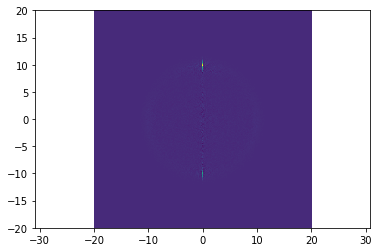

In [6]:
dz = bins[1:]-bins[:-1]
reconstructed_img = abel_inverse(img, bins) * dz[None, :]
plt.pcolormesh(bins, bins, reconstructed_img.T)
plt.axis('equal')
plt.show()

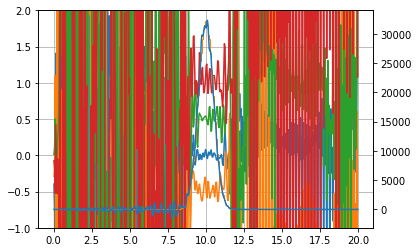

In [7]:
z_edges = bins
r_edges = np.linspace(0, 20, 501)
th_edges = np.linspace(-np.pi, np.pi, 721)
r_centers = (r_edges[:-1] + r_edges[1:]) / 2

reconstructed = Hist2d(reconstructed_img, z_edges, z_edges)
polarized = Hist2d(None, r_edges, th_edges)  # shape=(r,th)
polarized.intensity = convert_df_xy2rth(lambda z, r: reconstructed.intensity(r, z))

weighted = polarized.copy
weighted.intensity = lambda r, th: polarized.intensity(r, th)*abs(r*np.sin(th))*np.pi
_, coeff, _ = finite_legendre_transform_in_theta(polarized.hist.T,
                                                 polarized.y_edges,
                                                 4+1)  # shapes=(n,r)(n,th)

plt.figure()
for beta in coeff[1:]/coeff[0]:
    plt.plot(r_centers, beta)
plt.ylim(-1, 2)
plt.grid(True)
plt.twinx()
plt.plot(r_centers, weighted.hist.sum(1))
plt.hist(r, r_edges, histtype='step')
plt.show()